In [829]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2.1 <br>
Compressor <br>
<br>
Isentropic Efficiency = 0.85 <br>
Pressure Ratio = 4.0 <br>
<br>
Find Polytropic Efficiency & plot the variation of Isentropic Efficiency over a range of pressure ratio from 0.0 to 70.0

$$
\eta_{c} =\frac{(\frac{p_{02}}{p_{01}})^{(\gamma -1)/\gamma}-1}{(\frac{p_{02}}{p_{01}})^{(\gamma -1)/\gamma \eta_{\infty c}}-1} \\
\eta_{c} *(\frac{p_{02}}{p_{01}})^{(\gamma -1)/\gamma \eta_{\infty c}}-1 =(\frac{p_{02}}{p_{01}})^{(\gamma -1)/\gamma}-1 \\
(\frac{p_{02}}{p_{01}})^{(\gamma -1)/\gamma \eta_{\infty c}}-1 =\frac{(\frac{p_{02}}{p_{01}})^{(\gamma -1)/\gamma}-1}{\eta_{c}} \\
(\frac{p_{02}}{p_{01}})^{(\gamma -1)/\gamma \eta_{\infty c}} =\frac{(\frac{p_{02}}{p_{01}})^{(\gamma -1)/\gamma}-1}{\eta_{c}} +1 \\
\frac{\gamma -1}{\gamma \eta_{\infty c}} ln(\frac{p_{02}}{p_{01}}) =ln(\frac{(\frac{p_{02}}{p_{01}})^{(\gamma -1)/\gamma}-1}{\eta_{c}} +1) \\
\frac{\gamma -1}{\gamma \eta_{\infty c}} =\frac{ln(\frac{(\frac{p_{02}}{p_{01}})^{(\gamma -1)/\gamma}-1}{\eta_{c}} +1)}{ln(\frac{p_{02}}{p_{01}})} \\
\frac{1}{\eta_{\infty c}} =\frac{ln(\frac{(\frac{p_{02}}{p_{01}})^{(\gamma -1)/\gamma}-1}{\eta_{c}} +1) \gamma}{ln(\frac{p_{02}}{p_{01}})(\gamma -1)} \\
\eta_{\infty c} =\frac{ln(\frac{p_{02}}{p_{01}})(\gamma -1)}{ln(\frac{(\frac{p_{02}}{p_{01}})^{(\gamma -1)/\gamma}-1}{\eta_{c}} +1) \gamma} \\
$$

In [830]:
# For a Compressor

# IE is Isentropic Efficiency, PR is Pressure Ratio, PE is Polytropic Efficiency

IE = 0.85
PR = 4.0
gamma = 1.40
PE = (np.log(PR)*(gamma-1))/(np.log((((PR)**((gamma-1)/gamma)-1)/IE)+1)*gamma)
print("Polytropic Efficiency = %5.3f" % (PE))


Polytropic Efficiency = 0.876


In [831]:
def isoeff(PE,PR,gamma):
    return ((PR)**((gamma-1)/gamma)-1)/((PR)**((gamma-1)/(gamma*PE))-1)

Isentropic Efficiency at PR = 2.0 = 0.863
Isentropic Efficiency at PR = 10.0 = 0.832


C:\Users\there\AppData\Local\Temp\ipykernel_11508\476788659.py:2: RuntimeWarning: invalid value encountered in divide
  return ((PR)**((gamma-1)/gamma)-1)/((PR)**((gamma-1)/(gamma*PE))-1)


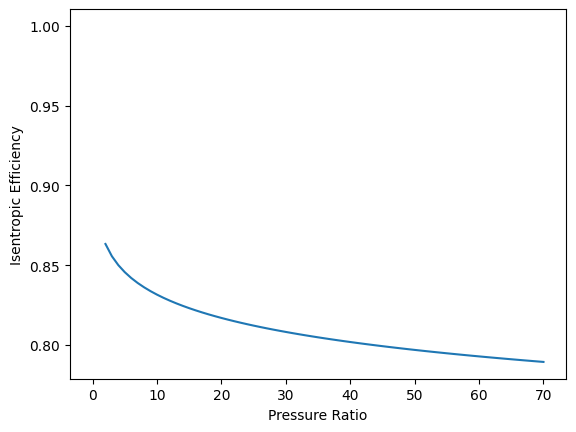

In [832]:
PRs = np.arange(71)
IEs = isoeff(PE,PRs,gamma)
print("Isentropic Efficiency at PR = 2.0 = %5.3f" % (IEs[2]))
print("Isentropic Efficiency at PR = 10.0 = %5.3f" % (IEs[10]))
plt.plot(PRs,IEs)
plt.xlabel('Pressure Ratio')
plt.ylabel('Isentropic Efficiency')
plt.show()

# 2.2 <br>
Compressor: <br>
Pressure Ratio: 11.0 <br>
Isentropic Efficiency: 0.82 <br>
<br>
Combustor: <br>
Pressure Loss: 0.4 bar <br>
Efficiency: .99 <br>
<br>
Turbine: <br>
Inlet Temp: 1150 K <br>
Gas-Gen Turbine IE: 0.87 <br>
Power Turbine IE: 0.89 <br>
Mechanical Efficiency 0.98 <br>
<br>
Ambient: 1 bar, 288 K <br>

Find air mass flow rate required to deliver 20 MW of shaft power, and the SFC

$$
W_{net} =P*\eta_{PT}
$$

In [833]:
# Power output of the gas turbine

power = 20 #MW
IEPT = 0.89

wnet = power * IEPT
print("Output Power = %4.1f MW" % (wnet))

Output Power = 17.8 MW


$$
h_1 =c_p * T_1
$$

In [834]:
# h1

T1 = 288 #K
cp = 1.005

h1 = cp * T1
print("h1 = %6.2f kJ/kg" % (h1))

h1 = 289.44 kJ/kg


$$
\frac{T_{2s}}{T_1} =(\frac{p_{2s}}{p_1})^{\frac{\gamma-1}{\gamma}} \\
\frac{T_{2s}}{T_1} =(\frac{p_2}{p_1})^{\frac{\gamma-1}{\gamma}} \\
T_{2s} =T_1(\frac{p_2}{p_1})^{\frac{\gamma-1}{\gamma}} \\
$$

In [835]:
# T2s

PR = 11

T2s = T1*((PR)**((gamma-1)/gamma))
print("T2s = %6.2f K" % (T2s))

T2s = 571.39 K


$$
\eta_{c} =\frac{T_{2s} -T_1}{T_2-T_1} \\
T_2-T_1 =\frac{T_{2s} -T_1}{\eta_{c}} \\
T_2 =\frac{T_{2s} -T_1}{\eta_{c}} +T_1
$$

In [836]:
#T2

IEC = 0.82

T2 = ((T2s-T1)/IEC)+T1
print("T2 = %6.2f K" % (T2))

T2 = 633.60 K


$$
p_3 -p_2 = p_{loss}
$$

In [837]:
# p3

ploss = 0.4

# p1 is ambient (1 bar) so p2 = PR, 11 bar

p2 = 11

p3 = ploss + p2
print ("p3 = %5.2f bar" % (p3))

p3 = 11.40 bar


$$
T_{4s} =T_3(\frac{p_{4s}}{p_3})^{\frac{\gamma-1}{\gamma}}
$$

In [838]:
# T4s

T3 = 1150 #K

# p4s = p4 = p1

p4s = 1

T4s = T3*((p4s/p3)**((gamma-1)/gamma))
print("T4s = %6.2f K" % (T4s))

T4s = 573.75 K


$$
\eta_{c} =\frac{T_3 -T_4}{T_3-T_{4s}} \\
\eta_{c}(T_3-T_{4s}) =T_3 -T_4 \\
\eta_{c}(T_3-T_{4s})-T_3= -T_4 \\
T_4 = -\eta_{c}(T_3-T_{4s})+T_3
$$

In [839]:
# T4

IEGT = 0.87

T4 = -IEGT*(T3-T4s)+T3
print("T4 = %6.2f K" % (T4))

T4 = 648.67 K


$$
Q_S =\eta_{comb} *(c_p(T_3-T_2)) \\
\\
Q_R = c_p(T_4-T_1)
$$

In [840]:
# Heat

ncomb = 0.99

Qs = ncomb * (cp*(T3-T2))
Qr = cp*(T4-T1)

print("Heat Supplied (Q_S) = %6.2f kJ/kg" % (Qs))
print("Heat Rejected (Q_R) = %6.2f kJ/kg" % (Qr))

Heat Supplied (Q_S) = 513.79 kJ/kg
Heat Rejected (Q_R) = 362.47 kJ/kg


$$
\dot{m} = \frac{W_{net}}{Q_S-Q_R}
$$

In [841]:
# Air mass flow rate

wnetkw = 1000*wnet
 
amfr = wnetkw/(Qs-Qr)

print("The mass flow rate of air through the turbine is %6.2f kg/s" % (amfr))

The mass flow rate of air through the turbine is 117.63 kg/s


$$
\dot{m_f} *CV = \dot{m_a}*c_{p_g}*(T_3-T_2) \\
\dot{m_f} = \frac{(\dot{m_a}*c_{p_g}*(T_3-T_2))}{CV}
$$

# 2.4 <br>
| | A | B | C |
| --- | --- | --- | --- |
| Polytropic Efficiency (Compressor) | 0.87 | 0.88 | 0.89 |
| Polytropic Efficiency (Turbine) | 0.89 | 0.88 | 0.88 |
| Compressor Pressure Ratio | 9.0 | 12.0 | 16.0 |
| Compressor Pressure Loss | 5.0% | 5.0% | 5.0% |
| Turbine Inlet Temperature | 1150 K | 1400 K | 1600 K |
| Rator Cooling Bleed | - | 2.5% | 5.0% |
| Airflow | 75.0 kg/s | 80.0 kg/s | 85.0 kg/s |

Combustion Efficiency = 99% <br>
Mechanical Efficiency 99% <br>
Inlet/Exhaust Pressure Loss = 0 bar <br>
<br>
Find Power & SFC for each <br>
Find the % Improvement from version A

$$
\frac{T_3}{T_4} =(\frac{p_3}{p_4})^\frac{\eta-1}{\eta} \\
\frac{T_3}{T_4} =(\frac{p_2 \Delta p_{comb}}{p_1})^{\frac{\gamma-1}{\gamma}\eta_{\infty t}} \\
T_4 = \frac{T_3}{(\frac{p_2 \Delta p_{comb}}{p_1})^{\frac{\gamma-1}{\gamma}\eta_{\infty t}}}
$$

In [842]:
# For Version A
# Outlet Temp
TinA = 1150
PRA = 9
PEtA = 0.89
deltaPcomb = 0.95

T4A = TinA/(((PRA*deltaPcomb)**(((gamma-1)/gamma)*PEtA)))
print("T4A = %6.2f K" % (T4A))

T4A = 666.36 K


In [843]:
# For Version B
# Outlet Temp
TinB = 1400
PRB = 12
PEtB = 0.88

T4B = TinB/(((PRB*deltaPcomb)**(((gamma-1)/gamma)*PEtB)))
print("T4B = %6.2f K" % (T4B))

T4B = 759.26 K


In [844]:
# For Version C
# Outlet Temp
TinC = 1600
PRC = 16
PEtC = 0.88

T4C = TinC/(((PRC*deltaPcomb)**(((gamma-1)/gamma)*PEtC)))
print("T4C = %6.2f K" % (T4C))

T4C = 807.18 K


$$
\eta_{c} = \eta_{mech} *w_t \\
\dot{m} (h_2-h_1) = \eta_{mech} *\dot{m}(h_3-h_4) \\
\dot{m} c_p (T_2-T_1) = \eta_{mech} *\dot{m} c_p (T_3-T_4) \\
(T_2-T_1) = \eta_{mech} *(T_3-T_4)
$$

In [845]:
# For Version A
# delta T1 to T2

IEmech = 0.99

t21A = IEmech *(TinA-T4A)

print("Delta T1A to T2A = %6.2f K" % (t21A))

Delta T1A to T2A = 478.80 K


In [846]:
# For Version B
# delta T1 to T2

t21B = IEmech *(TinB-T4B)

print("Delta T1B to T2B = %6.2f K" % (t21B))

Delta T1B to T2B = 634.33 K


In [847]:
# For Version A
# delta T1 to T2

t21C = IEmech *(TinC-T4C)

print("Delta T1C to T2C = %6.2f K" % (t21C))

Delta T1C to T2C = 784.89 K


$$
\frac{T_2}{T_1} =(\frac{p_2}{p_1})^\frac{n-1}{n} \\
\frac{T_2}{T_1} =(\frac{p_2}{p_1})^\frac{\gamma-1}{\gamma \eta_{\infty c}} \\
$$

In [848]:
# For Version A
# T2/T1

PEcA = 0.87

t2o1A = (PRA)**((gamma-1)/(gamma*PEcA))

print("T2A/T1A = %4.2f " % (t2o1A))

T2A/T1A = 2.06 


In [849]:
# For Version B
# T2/T1

PEcB = 0.88

t2o1B = (PRB)**((gamma-1)/(gamma*PEcB))

print("T2B/T1B = %4.2f " % (t2o1B))

T2B/T1B = 2.24 


In [850]:
# For Version C
# T2/T1

PEcC = 0.89

t2o1C = (PRC)**((gamma-1)/(gamma*PEcC))

print("T2C/T1C = %4.2f " % (t2o1C))

T2C/T1C = 2.44 


$$
T_2 -T_1 =x \\
\frac{T_2}{T_1} =y \\
T_1 y = T_2 \\
(T_1 y) - T_1 =x \\
T_1(y-1) =x \\
T_1 =\frac{x}{y-1}\\
T_2 = x+T_1
$$

In [851]:
# For Version A
# T1 & T2

T1A = t21A/(t2o1A-1)
T2A = t21A + T1A

print("T1A = %6.2f K" % (T1A))
print("T2A = %6.2f K" % (T2A))

T1A = 452.68 K
T2A = 931.48 K


In [852]:
# For Version B
# T1 & T2

T1B = t21B/(t2o1B-1)
T2B = t21B + T1B

print("T1B = %6.2f K" % (T1B))
print("T2B = %6.2f K" % (T2B))

T1B = 511.27 K
T2B = 1145.60 K


In [853]:
# For Version C
# T1 & T2

T1C = t21C/(t2o1C-1)
T2C = t21C + T1C

print("T1C = %6.2f K" % (T1C))
print("T2C = %6.2f K" % (T2C))

T1C = 546.84 K
T2C = 1331.73 K


$$
P =\dot{m} (W_t-W_c) \\
P =\dot{m} ((h_3-h_4)-(h_2-h_1)) \\
P =\dot{m} c_p ((T_3-T_4)-(T_2-T_1)) \\
$$

In [854]:
# For Version A
# Power Output

mfrA = 75

PowerA = mfrA*cp*((TinA-T4A)-(T2A-T1A))

print("The Power Output for Version A is %6.2f kW" % (PowerA))

The Power Output for Version A is 364.54 kW


In [855]:
# For Version B
# Power Output

mfrB = 80

PowerB = mfrB*cp*((TinB-T4B)-(T2B-T1B))

print("The Power Output for Version A is %6.2f kW" % (PowerB))

The Power Output for Version A is 515.15 kW


In [856]:
# For Version C
# Power Output

mfrC = 85

PowerC = mfrC*cp*((TinC-T4C)-(T2C-T1C))

print("The Power Output for Version A is %6.2f kW" % (PowerC))

The Power Output for Version A is 677.27 kW


$$
Percentage Increase = \frac{Final Value - Starting Value}{Starting Value}
$$

In [857]:
# Percentage Increase

percentAB = (PowerB-PowerA)/PowerA
print("The Percentage Improvement between A and B is %6.2f %%" % (percentAB))

percentAC = (PowerC-PowerA)/PowerA
print("The Percentage Improvement between A and C is %6.2f %%" % (percentAC))

The Percentage Improvement between A and B is   0.41 %
The Percentage Improvement between A and C is   0.86 %


$$
SFC = \frac{3600}{\dot{W_{net}}} \\
\dot{W_{net}} = \frac{P}{\dot{m}}
$$

In [858]:
# SFC

SFCA = 3600/(PowerA/mfrA)
SFCB = 3600/(PowerB/mfrB)
SFCC = 3600/(PowerC/mfrC)
print("The SFC of Version A is %6.2f kg/kWh" % (SFCA))
print("The SFC of Version B is %6.2f kg/kWh" % (SFCB))
print("The SFC of Version C is %6.2f kg/kWh" % (SFCC))

The SFC of Version A is 740.66 kg/kWh
The SFC of Version B is 559.06 kg/kWh
The SFC of Version C is 451.82 kg/kWh
